<a href="https://colab.research.google.com/github/OJB-Quantum/LaTeX-to-Nemeth-Braille-to-SVG/blob/main/LaTeX_to_Nemeth_Braille_to_SVG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this script (written by Onri Jay Benally):
- To generate an SVG of mathematics and text in Braille format.
-  When paired with open source modeling and rendering tools like Blender, the SVG can be converted into a 3D-printable object.

In [1]:
!pip install svgwrite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.1 MB/s eta 0:00:00


In [3]:
import svgwrite

# Simple dictionary to map LaTeX symbols to Nemeth Braille dots
latex_to_nemeth = {
    "\\alpha": "⠁⠇⠋⠁",  # Example mapping
    "\\beta": "⠃⠢⠞⠕⠅",  # Example mapping
    "x^2": "⠭⠔⠆",  # Example mapping for x squared
    # Add more mappings as needed
}

# Function to convert LaTeX to Nemeth Braille dots
def convert_to_nemeth(latex_str):
    nemeth_str = ''
    for symbol in latex_str.split():
        if symbol in latex_to_nemeth:
            nemeth_str += latex_to_nemeth[symbol] + ' '
        else:
            nemeth_str += "⠿"  # Placeholder for unmapped symbols
    return nemeth_str.strip()

# Function to create an SVG with Nemeth dots and description
def create_svg(latex_str, description, filename="output.svg"):
    nemeth_str = convert_to_nemeth(latex_str)

    # Create an SVG drawing
    dwg = svgwrite.Drawing(filename, profile='tiny', size=("400px", "200px"))

    # Add Nemeth dots
    dwg.add(dwg.text(nemeth_str, insert=(10, 50), font_size="20px", font_family="Braille"))

    # Add description text
    dwg.add(dwg.text(description, insert=(10, 100), font_size="15px", fill="black"))

    # Save the SVG
    dwg.save()

# Example usage
latex_input = "\\alpha x^2 \\beta"
description = "This is an example of alpha times x squared plus beta."
create_svg(latex_input, description)

See the SVG output in the files section on the left.
(Below is a screenshot of the example Braille output)

Here is the LaTeX example being converted to Braille: $\alpha x^2 \beta$

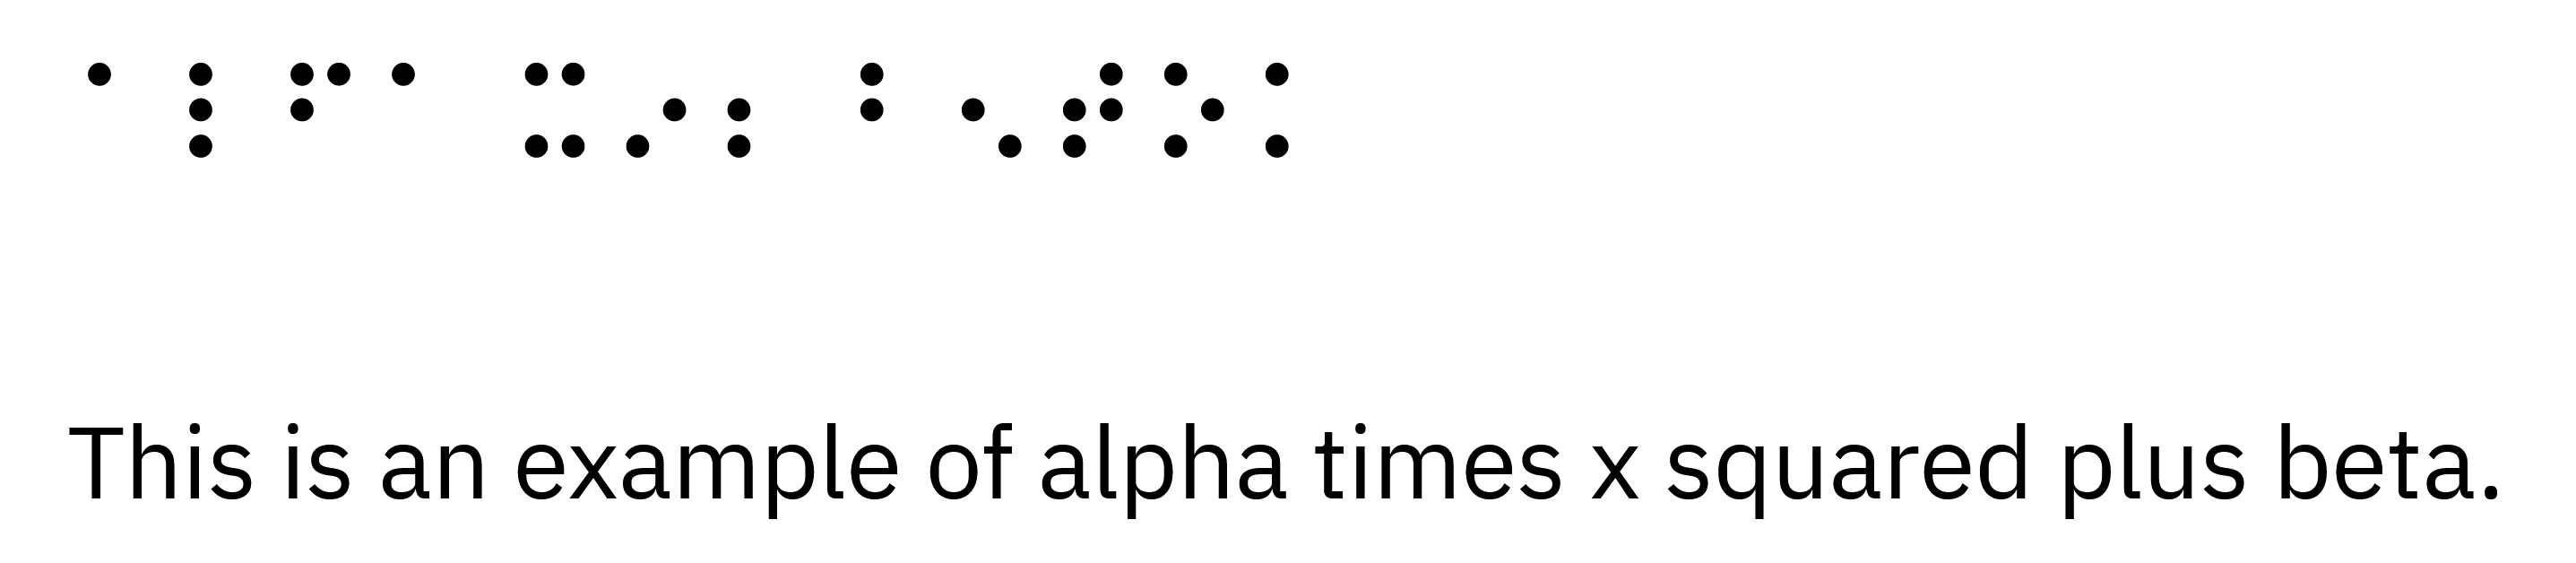

In [10]:
import svgwrite

# A *VERY* simplified dictionary mapping some LaTeX pieces to Nemeth Braille.
# (These are placeholders and examples.
#  Proper Nemeth transcription requires more rules and context.)
latex_to_nemeth = {
    "\\left[": "⠐⠣",        # Opening bracket (placeholder example)
    "\\right]": "⠐⠜",       # Closing bracket (placeholder example)
    "\\frac": "⠣⠋⠗⠁⠉⠈⠜",  # The word "frac" in Braille (placeholder)
    "\\hbar^2": "⠓⠃⠁⠗⠔⠆",  # h-bar squared (placeholder)
    "2": "⠼⠃",             # The digit "2"
    "m^*": "⠍⠔⠡",          # m star (placeholder)
    "\\nabla^2": "⠝⠙⠇⠁⠔⠆",  # nabla squared (placeholder)
    "+": "⠐⠖",             # plus sign (placeholder)
    "U(\\vec{r})": "⠠⠥⠐⠣⠗⠐⠜",   # U(r) with vector arrow suppressed for brevity
    "|\\psi(\\vec{r})>": "⠸⠏⠎⠊⠐⠣⠗⠐⠜",  # |psi(r)>
    "=": "⠨⠅",             # equals sign (placeholder)
    "E": "⠠⠑",             # capital E
}

def convert_to_nemeth(latex_str):
    """
    Converts a given LaTeX string to a (very rough) Nemeth Braille equivalent
    using the dictionary above. Unmapped symbols are replaced with ⠿.
    """
    # We will split on whitespace *and* recognized tokens to handle multi-character tokens.
    # This simplistic approach will break more complex LaTeX. Real usage requires a parser.
    parts = latex_str.split()
    nemeth_str = ""

    for part in parts:
        # If the dictionary contains the full token, map it.
        if part in latex_to_nemeth:
            nemeth_str += latex_to_nemeth[part] + " "
        else:
            # Otherwise break it down or fall back to placeholder
            # For demonstration, we just fallback to a placeholder ⠿
            nemeth_str += "⠿ "

    return nemeth_str.strip()

def create_svg(latex_str, description, filename="output.svg"):
    """
    Creates an SVG that includes:
      1) The (placeholder) Nemeth Braille transcription.
      2) A visual text description of the content.
    """
    nemeth_str = convert_to_nemeth(latex_str)

    # Create an SVG drawing
    dwg = svgwrite.Drawing(filename, profile='tiny', size=("600px", "200px"))

    # Add Nemeth dots (placeholder Braille font)
    dwg.add(dwg.text(nemeth_str,
                     insert=(10, 50),
                     font_size="20px",
                     font_family="Braille"))

    # Add description text
    dwg.add(dwg.text(description,
                     insert=(10, 100),
                     font_size="15px",
                     fill="black"))

    # Save the SVG
    dwg.save()

if __name__ == "__main__":
    # Example LaTeX input:
    # [-\frac{\hbar^2}{2 m^*} \nabla^2 + U(\vec{r}) ] | \psi(\vec{r}) > = E | \psi(\vec{r}) >
    #   The bra-ket notation is replaced by | and > as requested.

    latex_input = (
        "\\left[ -\\frac{\\hbar^2}{2 m^*} \\nabla^2 + U(\\vec{r}) \\right] |\\psi(\\vec{r})> = E |\\psi(\\vec{r})>"
    )
    description = (
        "Nemeth Braille transcription of the (time-independent) "
        "Schrodinger eq."
    )

    create_svg(latex_input, description, filename="schrodinger_equation.svg")
    print("SVG file 'schrodinger_equation.svg' created with a placeholder Nemeth Braille transcription.")


SVG file 'schrodinger_equation.svg' created with a placeholder Nemeth Braille transcription.


$\left[-\frac{\hbar^2}{2 m^*} \nabla^2+U(\vec{r})\right] \psi(\vec{r})=E \psi(\vec{r})$

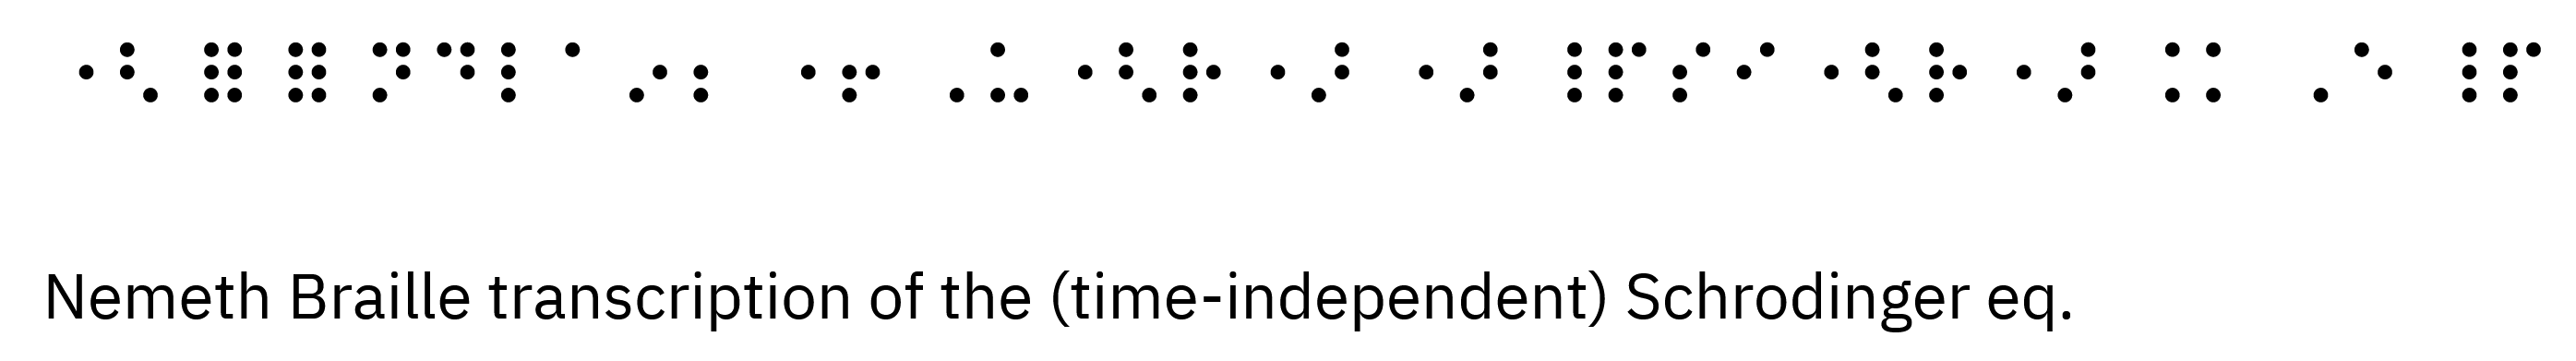